# **Import Libraries**

In [1]:
#!pip install scikit-learn

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import scipy
import re

sns.set()
%matplotlib inline
%load_ext google.colab.data_table

In [3]:
# import warnings
# warnings.filterwarnings('ignore')

In [4]:
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [6]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# **Load and View Dataset**

In [7]:
df = pd.read_csv('/content/gdrive/MyDrive/Code/delinquency_retrain.csv')

In [8]:
# df = df.drop(columns = 'order_id')
# df.rename(columns={'s_partner_type': 's_merchant'}, inplace=True)

In [9]:
#df = df.drop(columns = ['order_id', 'r_collected_order_value', 'r_ENR_order_value', 's_period', 's_late_group'])

In [10]:
df = df[['s_status', 'r_income_order', 'r_0.3income_paypermonth', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_city', 's_gps', 's_merchant', 's_product', 's_retention']]

In [11]:
df.head()

,s_status,r_income_order,r_0.3income_paypermonth,s_gender,s_age,s_gender_age,s_refer,s_job,s_city,s_gps,s_merchant,s_product,s_retention
0,1,1.26,1.81,50,75,85,80,50,87,50,70,90,0
1,1,0.63,1.81,50,40,40,80,50,87,50,70,90,0
2,1,1.88,2.72,50,70,65,40,50,87,0,70,90,0
3,1,1.33,3.59,50,70,65,60,50,65,0,70,90,0
4,1,1.20,3.23,55,40,30,80,50,0,50,70,90,0


In [12]:
df.shape

(1543, 13)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   s_status                 1543 non-null   int64  
 1   r_income_order           1543 non-null   float64
 2   r_0.3income_paypermonth  1543 non-null   float64
 3   s_gender                 1543 non-null   int64  
 4   s_age                    1543 non-null   int64  
 5   s_gender_age             1543 non-null   int64  
 6   s_refer                  1543 non-null   int64  
 7   s_job                    1543 non-null   int64  
 8   s_city                   1543 non-null   int64  
 9   s_gps                    1543 non-null   int64  
 10  s_merchant               1543 non-null   int64  
 11  s_product                1543 non-null   int64  
 12  s_retention              1543 non-null   int64  
dtypes: float64(2), int64(11)
memory usage: 156.8 KB


In [14]:
df.describe()

,s_status,r_income_order,r_0.3income_paypermonth,s_gender,s_age,s_gender_age,s_refer,s_job,s_city,s_gps,s_merchant,s_product,s_retention
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,0.913804,1.246358,1.831296,51.989631,58.162670,56.924822,68.917693,55.499028,66.178224,55.443940,64.452366,72.300713,0.149708
std,0.280744,1.141863,1.618119,2.448144,18.208801,20.352492,15.344985,12.880166,26.312425,45.012398,15.496794,29.314282,0.356901
min,0.000000,0.000000,0.000000,50.000000,30.000000,20.000000,30.000000,30.000000,0.000000,0.000000,30.000000,10.000000,0.000000
25%,1.000000,0.610000,0.940000,50.000000,40.000000,40.000000,60.000000,50.000000,50.000000,0.000000,70.000000,65.000000,0.000000
50%,1.000000,0.960000,1.410000,50.000000,70.000000,65.000000,80.000000,50.000000,75.000000,50.000000,70.000000,90.000000,0.000000
75%,1.000000,1.515000,2.280000,55.000000,75.000000,75.000000,80.000000,50.000000,87.000000,100.000000,70.000000,90.000000,0.000000
max,1.000000,18.320000,26.000000,55.000000,75.000000,85.000000,80.000000,95.000000,95.000000,100.000000,80.000000,95.000000,1.000000


In [15]:
print(df.describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))

          s_status  r_income_order  r_0.3income_paypermonth     s_gender  \
count  1543.000000     1543.000000              1543.000000  1543.000000   
mean      0.913804        1.246358                 1.831296    51.989631   
std       0.280744        1.141863                 1.618119     2.448144   
min       0.000000        0.000000                 0.000000    50.000000   
1%        0.000000        0.000000                 0.000000    50.000000   
5%        0.000000        0.260000                 0.361000    50.000000   
25%       1.000000        0.610000                 0.940000    50.000000   
50%       1.000000        0.960000                 1.410000    50.000000   
75%       1.000000        1.515000                 2.280000    55.000000   
95%       1.000000        3.279000                 4.276000    55.000000   
99%       1.000000        5.669600                 7.549400    55.000000   
max       1.000000       18.320000                26.000000    55.000000   

           

In [16]:
df.isna().sum()

s_status                   0
r_income_order             0
r_0.3income_paypermonth    0
s_gender                   0
s_age                      0
s_gender_age               0
s_refer                    0
s_job                      0
s_city                     0
s_gps                      0
s_merchant                 0
s_product                  0
s_retention                0
dtype: int64

In [17]:
# sns.displot(df['s_late_group'])
# plt.show()

In [18]:
def feat_plot(feature):
    plt.figure(figsize=(16, 6))
    plt.subplot(1, 3, 1)
    feature.plot(kind = 'hist')
    plt.title(f'{feature.name} histogram plot')
    
    #mean = feature.describe().mean()
    plt.subplot(1, 3, 2)
    mu, sigma = scipy.stats.norm.fit(feature)
    sns.distplot(feature) 
    #plt.legend({'--': mu, 'sigma': sigma})
    plt.axvline(mu, linestyle = '--', color = 'green', )
    plt.axvline(sigma, linestyle = '--', color = 'red')
    plt.title(f'{feature.name} distribution plot')
    
    plt.subplot(1, 3, 3)
    sns.boxplot(feature)
    plt.title(f'{feature.name} box plot')
    plt.show()

In [19]:
num_feat = df.select_dtypes(exclude = 'object')

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


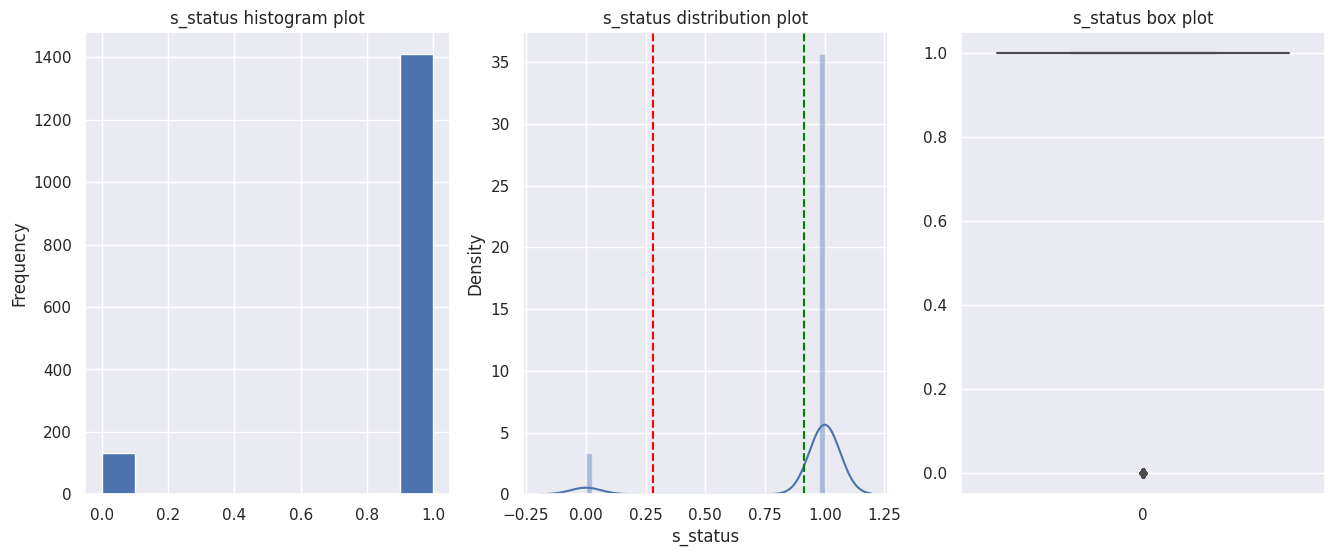

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


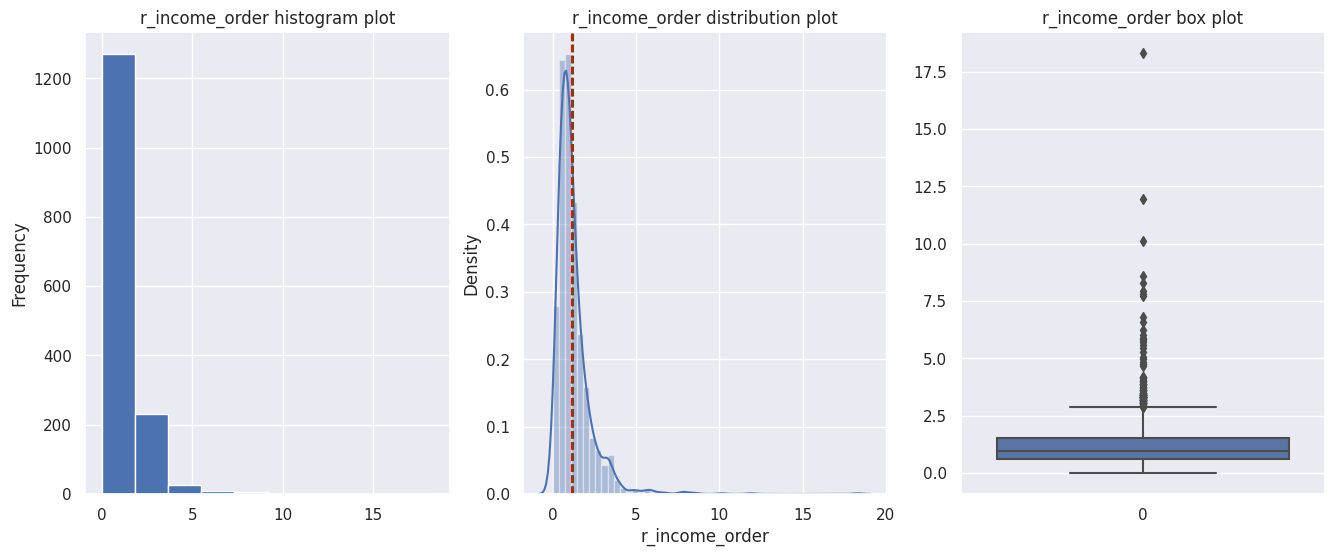

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


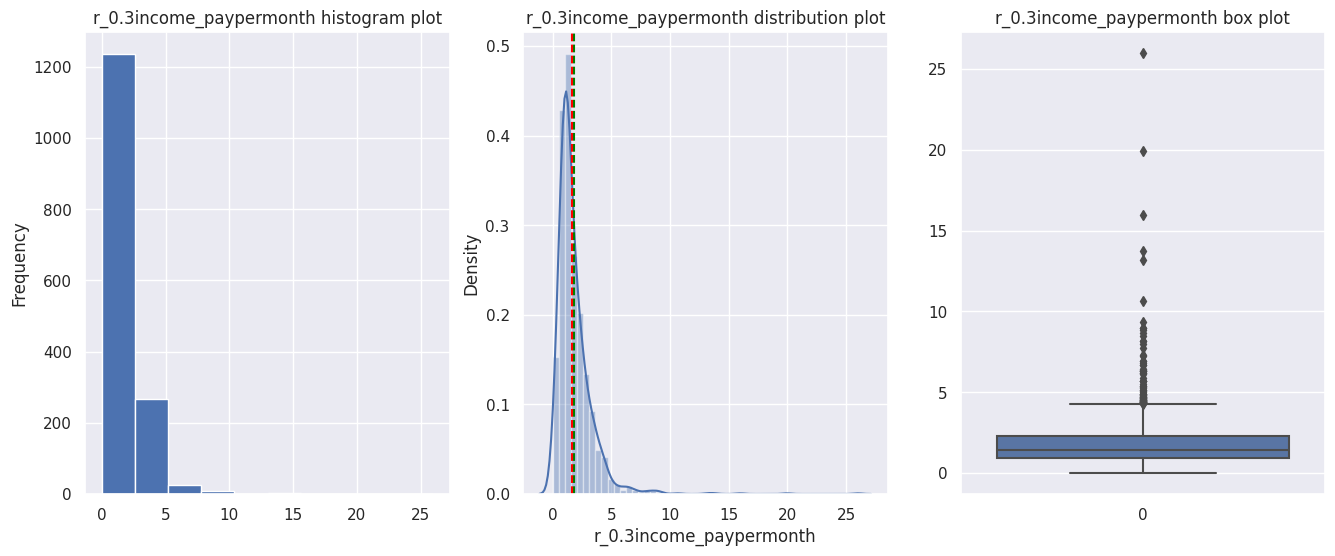

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


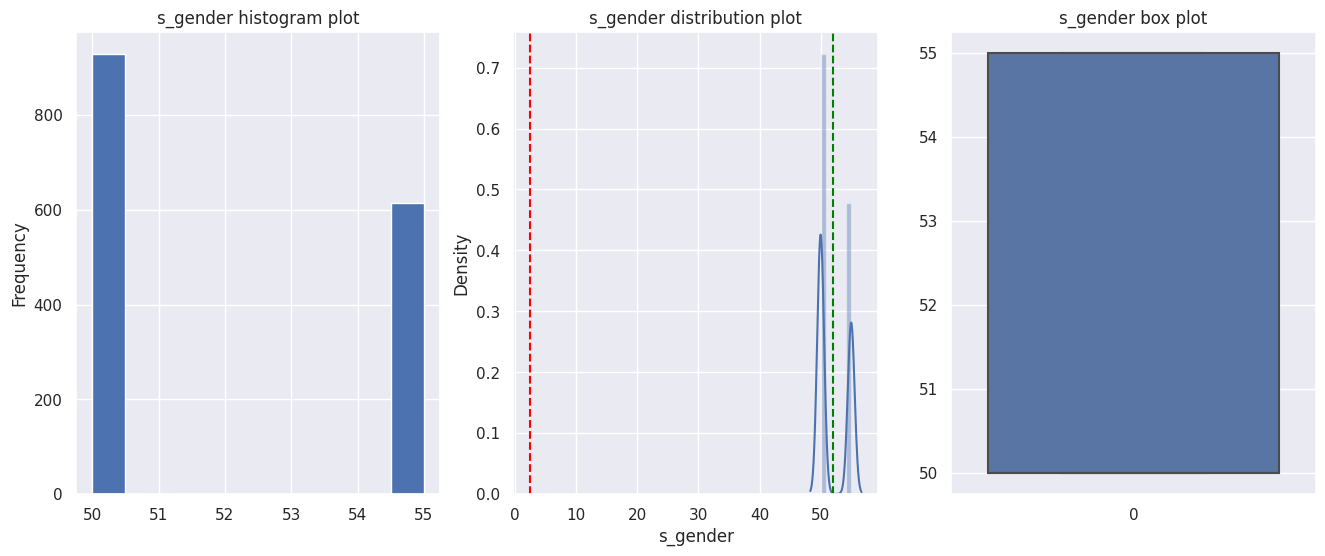

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


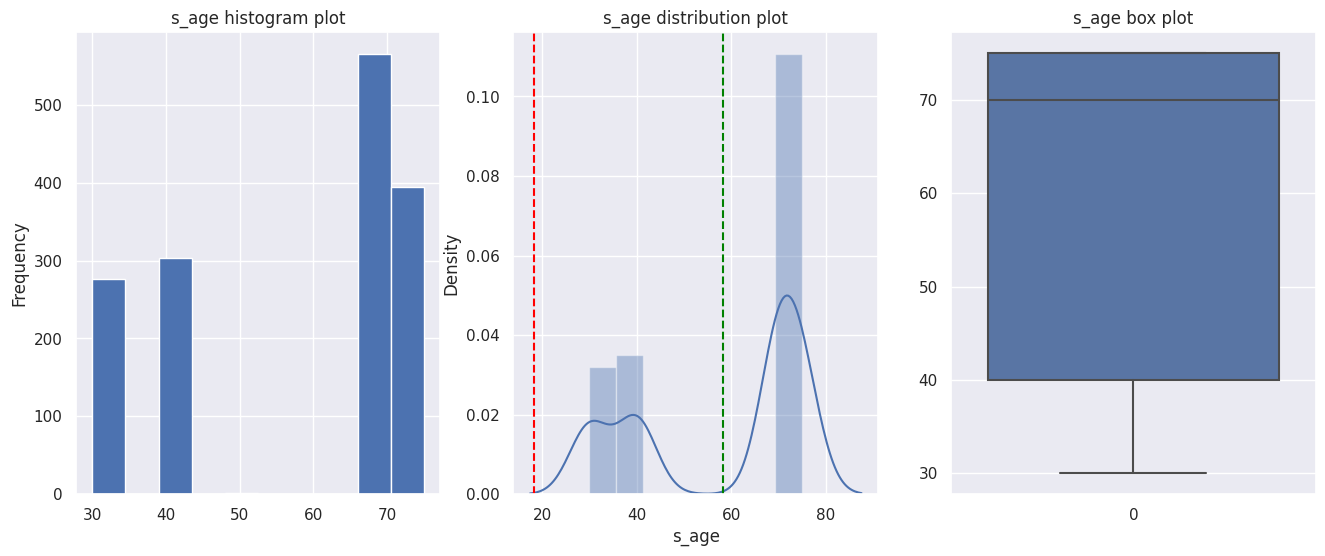

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


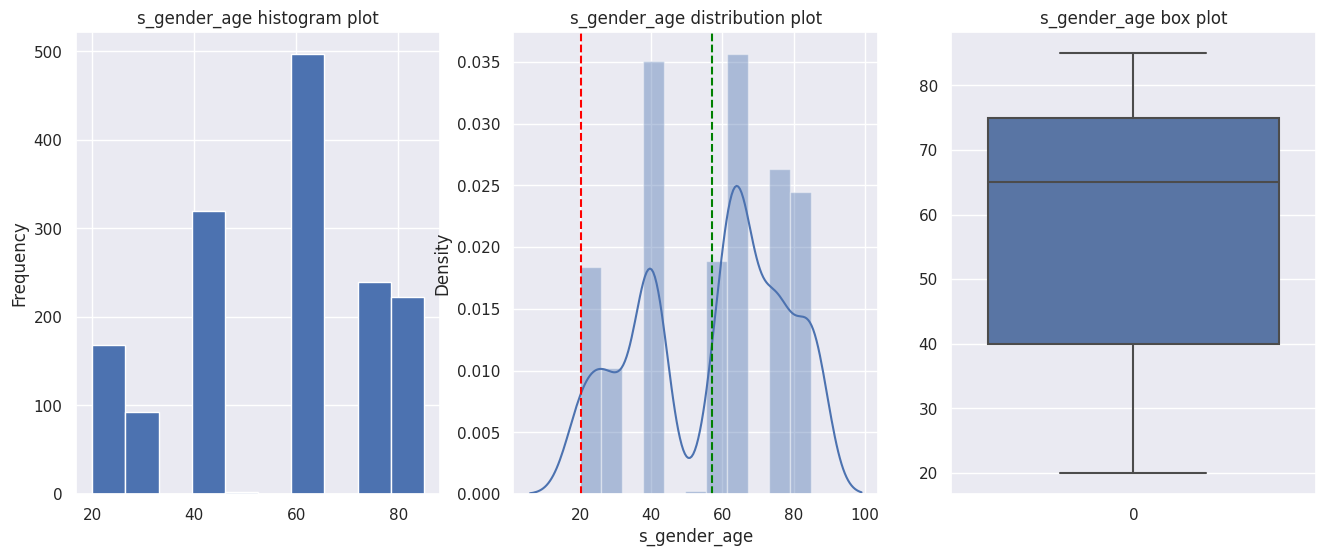

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


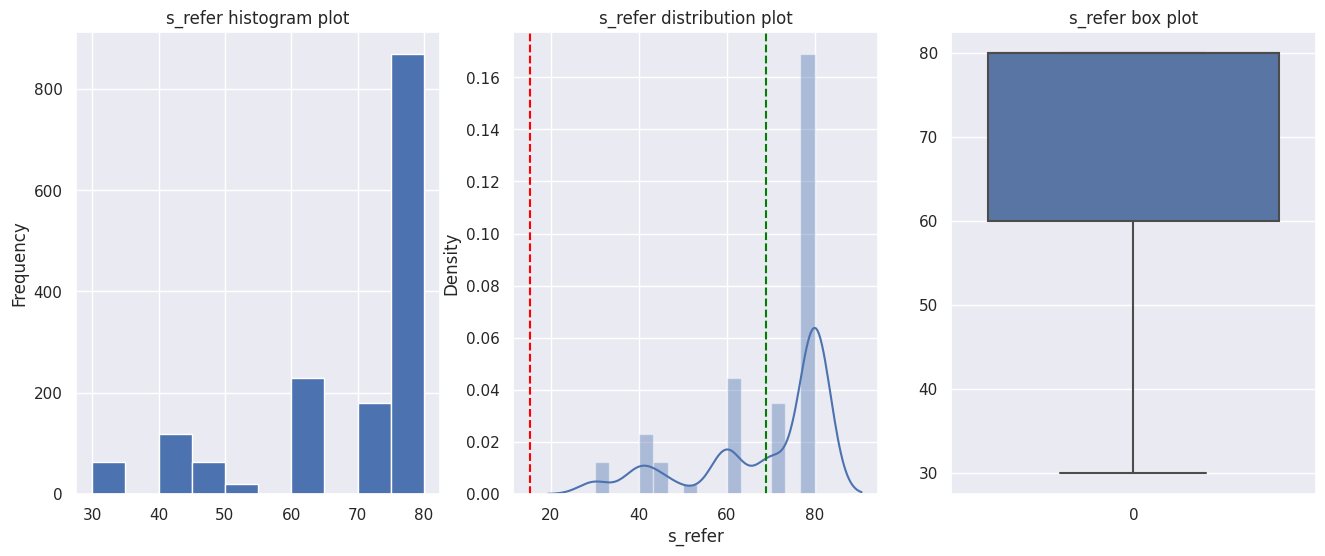

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


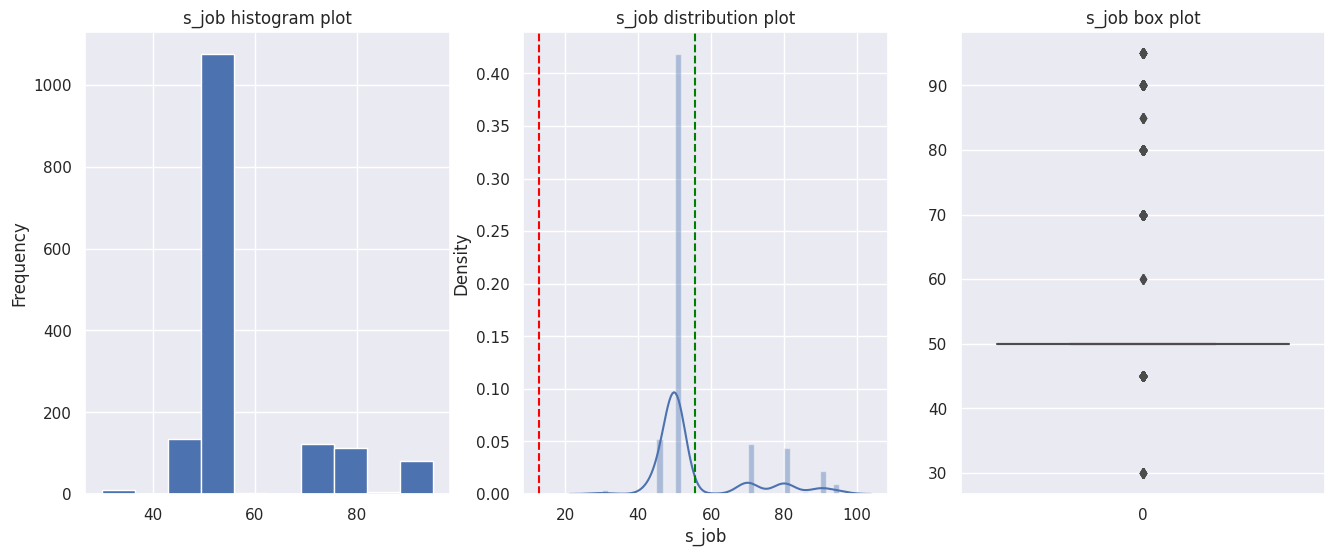

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


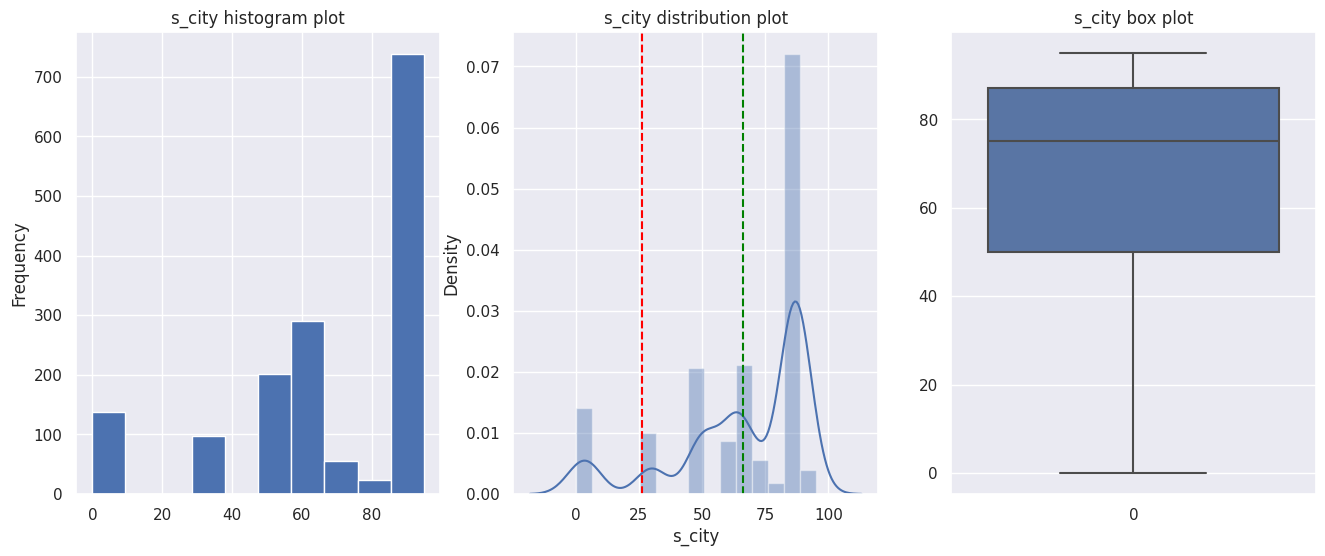

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


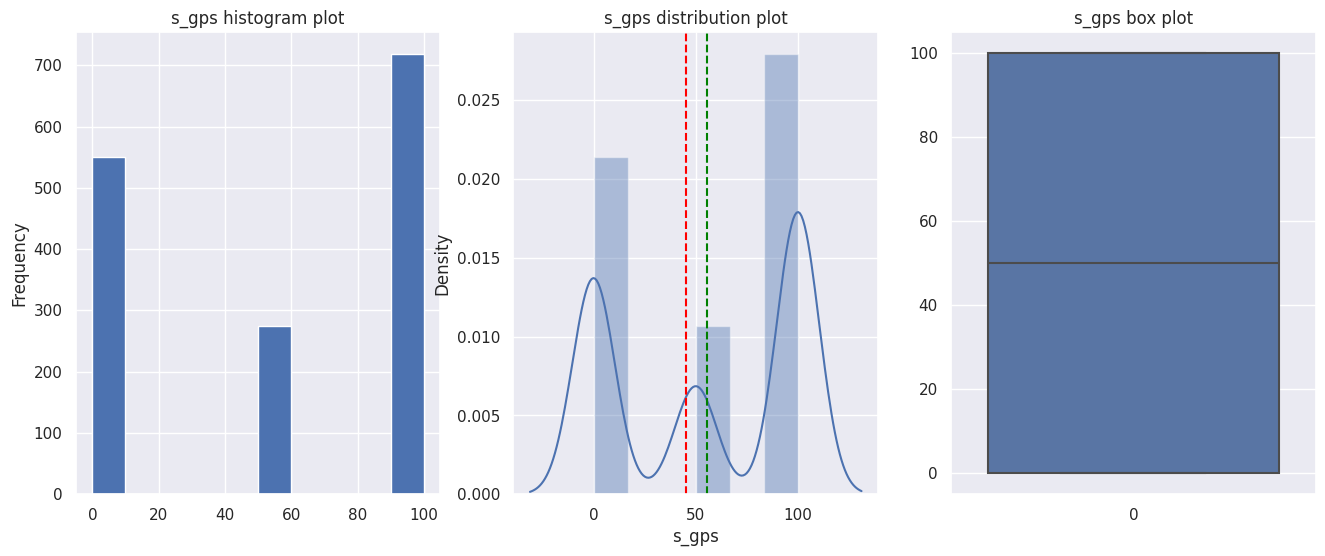

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


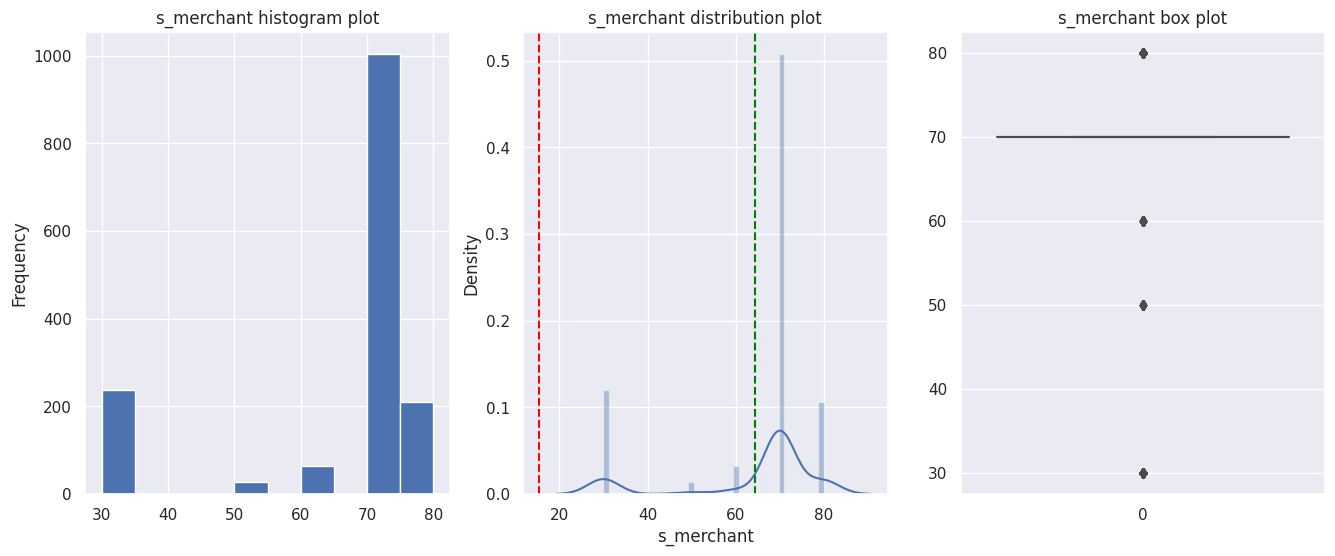

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


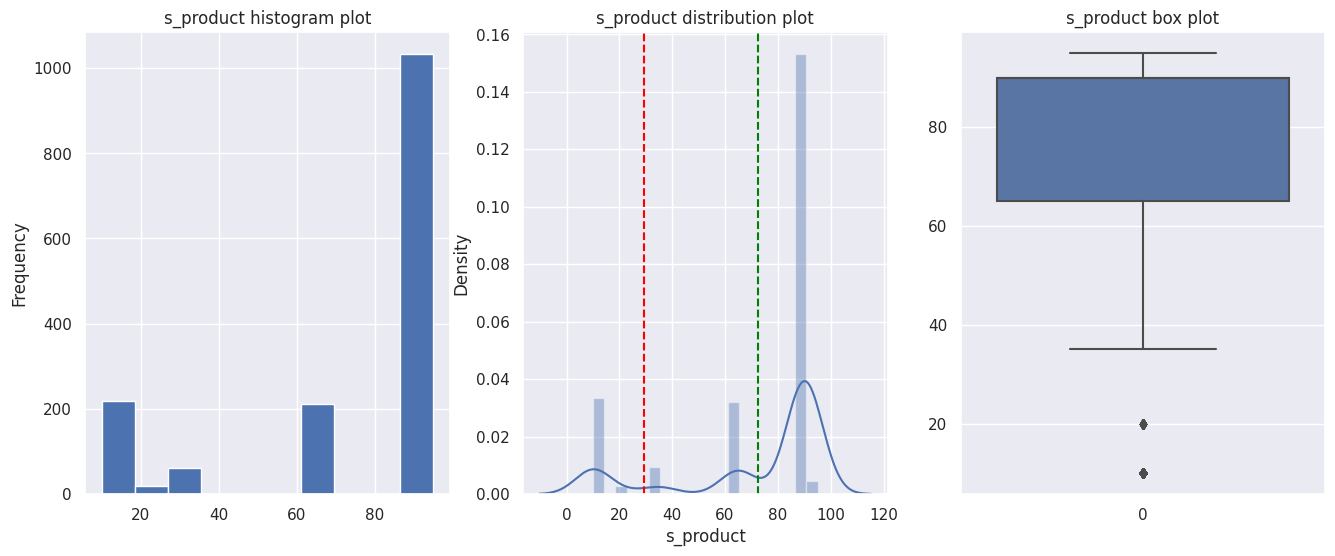

<ipython-input-18-5207d1057a72>:10: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(feature)


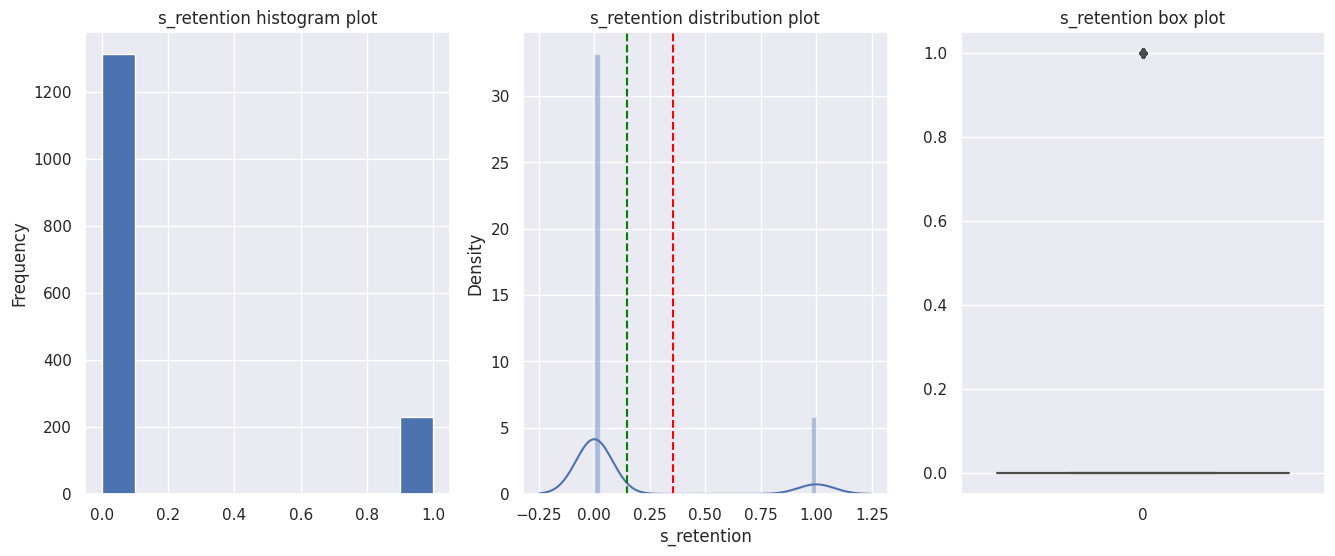

In [20]:
for i in num_feat.columns:
    feat_plot(num_feat[i])

In [21]:
independent_vars = ['r_income_order', 'r_0.3income_paypermonth', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_city', 's_gps', 's_merchant', 's_product', 's_retention']
correlation_matrix = df[independent_vars].corr()

#print(correlation_matrix)
correlation_matrix

,r_income_order,r_0.3income_paypermonth,s_gender,s_age,s_gender_age,s_refer,s_job,s_city,s_gps,s_merchant,s_product,s_retention
r_income_order,1.000000,0.907729,0.058897,0.066917,0.065107,-0.031080,0.061381,0.021407,-0.064095,0.075354,0.208574,-0.182377
r_0.3income_paypermonth,0.907729,1.000000,0.062507,0.077690,0.070034,-0.037565,0.020593,0.023303,-0.125876,0.049790,0.189859,-0.204397
s_gender,0.058897,0.062507,1.000000,0.071148,0.033721,0.109147,0.031219,0.031036,-0.021850,0.068054,0.092957,-0.059084
s_age,0.066917,0.077690,0.071148,1.000000,0.915217,0.170490,-0.026712,-0.002023,-0.052669,-0.023850,0.140505,-0.315893
s_gender_age,0.065107,0.070034,0.033721,0.915217,1.000000,0.177000,-0.012325,0.003622,-0.049849,-0.029760,0.120591,-0.296821
s_refer,-0.031080,-0.037565,0.109147,0.170490,0.177000,1.000000,-0.030733,0.091796,0.070033,0.093228,0.090022,-0.040851
s_job,0.061381,0.020593,0.031219,-0.026712,-0.012325,-0.030733,1.000000,-0.059869,0.174562,-0.166279,-0.143970,-0.064227
s_city,0.021407,0.023303,0.031036,-0.002023,0.003622,0.091796,-0.059869,1.000000,0.061437,0.373329,0.343968,0.097013
s_gps,-0.064095,-0.125876,-0.021850,-0.052669,-0.049849,0.070033,0.174562,0.061437,1.000000,-0.149123,-0.187045,0.040063
s_merchant,0.075354,0.049790,0.068054,-0.023850,-0.029760,0.093228,-0.166279,0.373329,-0.149123,1.000000,0.824836,0.307381


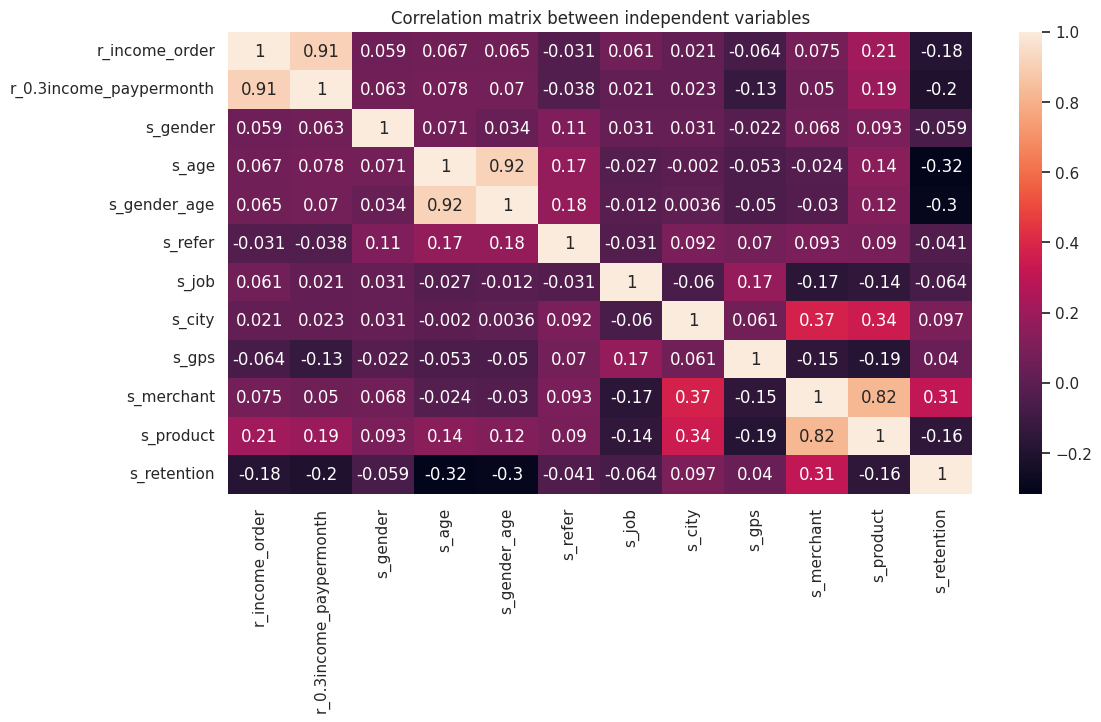

In [22]:
plt.figure(figsize=(12, 6)) 
sns.heatmap(correlation_matrix, annot=True) #, cmap="coolwarm")

plt.title('Correlation matrix between independent variables')  
plt.show()

<Axes: >

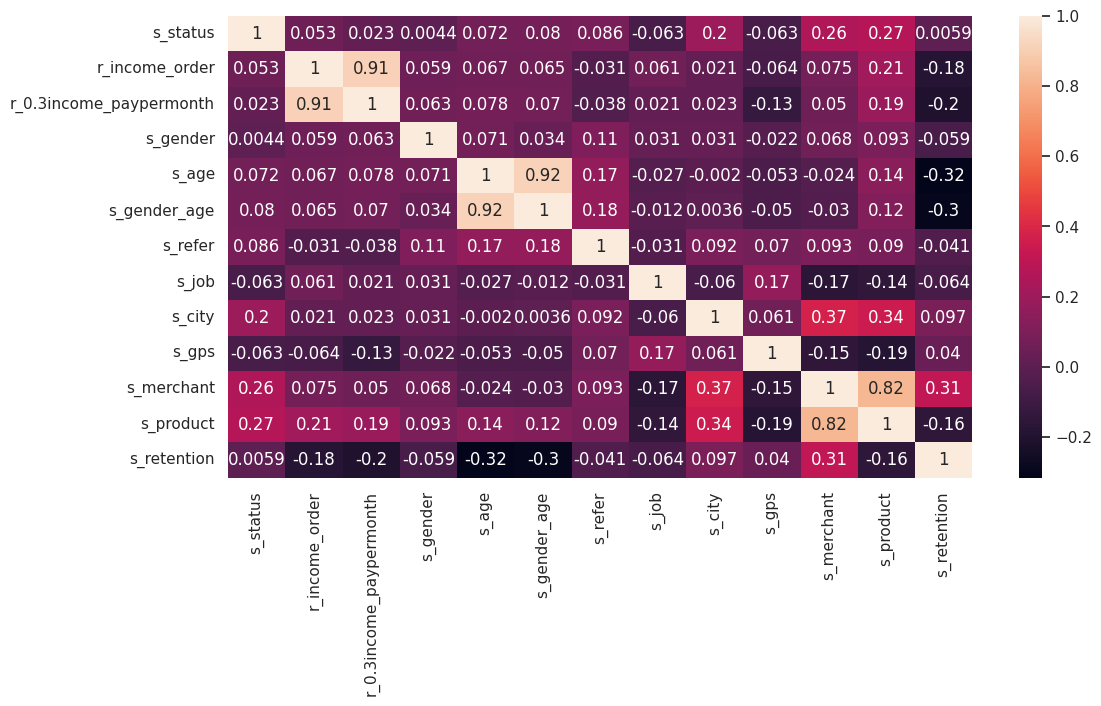

In [23]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(), annot=True)

# **Build Machine Learning Models**

## General Score - Linear Regression Model

In [24]:
dflr = pd.read_csv('/content/gdrive/MyDrive/Code/delinquency_retrain.csv')

In [25]:
#dflr = dflr.drop(columns = ['order_id', 's_status', 'r_collected_order_value', 'r_ENR_order_value', 's_late_group'])

In [26]:
dflr = dflr[['s_period', 'r_income_order', 'r_0.3income_paypermonth', 's_age', 's_gender_age', 's_refer', 's_job', 's_city', 's_merchant', 's_product']]

In [27]:
dflr.shape

(1543, 10)

In [28]:
dflr.head()

,s_period,r_income_order,r_0.3income_paypermonth,s_age,s_gender_age,s_refer,s_job,s_city,s_merchant,s_product
0,100,1.26,1.81,75,85,80,50,87,70,90
1,100,0.63,1.81,40,40,80,50,87,70,90
2,100,1.88,2.72,70,65,40,50,87,70,90
3,100,1.33,3.59,70,65,60,50,65,70,90
4,100,1.20,3.23,40,30,80,50,0,70,90


In [29]:
dflr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   s_period                 1543 non-null   int64  
 1   r_income_order           1543 non-null   float64
 2   r_0.3income_paypermonth  1543 non-null   float64
 3   s_age                    1543 non-null   int64  
 4   s_gender_age             1543 non-null   int64  
 5   s_refer                  1543 non-null   int64  
 6   s_job                    1543 non-null   int64  
 7   s_city                   1543 non-null   int64  
 8   s_merchant               1543 non-null   int64  
 9   s_product                1543 non-null   int64  
dtypes: float64(2), int64(8)
memory usage: 120.7 KB


In [30]:
dflr.describe()

,s_period,r_income_order,r_0.3income_paypermonth,s_age,s_gender_age,s_refer,s_job,s_city,s_merchant,s_product
count,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000,1543.000000
mean,94.935191,1.246358,1.831296,58.162670,56.924822,68.917693,55.499028,66.178224,64.452366,72.300713
std,19.177198,1.141863,1.618119,18.208801,20.352492,15.344985,12.880166,26.312425,15.496794,29.314282
min,0.000000,0.000000,0.000000,30.000000,20.000000,30.000000,30.000000,0.000000,30.000000,10.000000
25%,100.000000,0.610000,0.940000,40.000000,40.000000,60.000000,50.000000,50.000000,70.000000,65.000000
50%,100.000000,0.960000,1.410000,70.000000,65.000000,80.000000,50.000000,75.000000,70.000000,90.000000
75%,100.000000,1.515000,2.280000,75.000000,75.000000,80.000000,50.000000,87.000000,70.000000,90.000000
max,100.000000,18.320000,26.000000,75.000000,85.000000,80.000000,95.000000,95.000000,80.000000,95.000000


In [31]:
# independent_vars_1 = ['r_income_order', 'r_0.3income_paypermonth', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_city', 's_gps', 's_merchant', 's_product', 's_retention']
# correlation_matrix_1 = dflr[independent_vars_1].corr()

In [32]:
# plt.figure(figsize=(12, 6)) 
# sns.heatmap(correlation_matrix_1, annot=True) #, cmap="coolwarm")

# plt.title('Correlation matrix between independent variables')  
# plt.show()

In [33]:
X = dflr.drop(columns='s_period')
y = dflr['s_period']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=200)

In [35]:
model = LinearRegression()

In [36]:
model.fit(X_train, y_train)

LinearRegression()

In [37]:
# y_pred = model.predict(X_test)
# y_pred

In [38]:
print('Score: ', model.score(X_train, y_train))

Score:  0.06506404274812094


In [39]:
model.coef_

array([-2.28732105,  1.71766899,  0.05872993,  0.06637954,  0.068171  ,
        0.03740593,  0.0928622 ,  0.2100886 , -0.02792044])

In [83]:
model.intercept_

62.89908275739038

In [40]:
dflr.columns

Index(['s_period', 'r_income_order', 'r_0.3income_paypermonth', 's_age',
       's_gender_age', 's_refer', 's_job', 's_city', 's_merchant',
       's_product'],
      dtype='object')

In [41]:
orderlr_1 = 'Giả định 1'
new_orderlr_1 = pd.DataFrame({
    'r_income_order' : [0.87], 
    'r_0.3income_paypermonth' : [0.6],
    's_age' : [75], 
    's_gender_age' : [60], 
    's_refer' : [80],
    's_job' : [50], 
    's_city' : [60], 
    's_merchant' : [70], 
    's_product' : [90], 
})

In [42]:
prediction_1 = model.predict(new_orderlr_1 )
print('Điểm của đơn hàng', orderlr_1,'là: ', prediction_1)

Điểm của đơn hàng Giả định 1 là:  [95.41630275]


In [43]:
if prediction_1 >= 60:     # value may need to be adjusted
    print('Đơn hàng', orderlr_1, 'có thể tất toán đúng hạn')
else:
    print('Đơn hàng', orderlr_1, 'có thể thanh toán trễ hạn')

Đơn hàng Giả định 1 có thể tất toán đúng hạn


In [44]:
# # Add a constant column to the predictor variables
# X = sm.add_constant(X)

# # Fit the linear regression model
# model = sm.OLS(y, X).fit()

# # Print the summary statistics
# print(model.summary())

## User Score - Linear Regression Model

In [45]:
df_us = pd.read_csv('/content/gdrive/MyDrive/Code/delinquency_retrain.csv')

In [46]:
#df_us = df_us.drop(columns = ['order_id', 's_gender', 's_status', 'r_collected_order_value', 'r_ENR_order_value', 's_late_group'])

In [47]:
df_us = df_us[['s_period', 's_age', 's_gender_age', 's_refer', 's_job', 's_city']]

In [48]:
df_us.shape

(1543, 6)

In [49]:
df_us.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   s_period      1543 non-null   int64
 1   s_age         1543 non-null   int64
 2   s_gender_age  1543 non-null   int64
 3   s_refer       1543 non-null   int64
 4   s_job         1543 non-null   int64
 5   s_city        1543 non-null   int64
dtypes: int64(6)
memory usage: 72.5 KB


In [50]:
independent_vars_us = ['s_age', 's_gender_age', 's_refer', 's_job', 's_city']
correlation_matrix_us = df_us[independent_vars_us].corr()
print(correlation_matrix_us)

                 s_age  s_gender_age   s_refer     s_job    s_city
s_age         1.000000      0.915217  0.170490 -0.026712 -0.002023
s_gender_age  0.915217      1.000000  0.177000 -0.012325  0.003622
s_refer       0.170490      0.177000  1.000000 -0.030733  0.091796
s_job        -0.026712     -0.012325 -0.030733  1.000000 -0.059869
s_city       -0.002023      0.003622  0.091796 -0.059869  1.000000


In [51]:
X = df_us.drop(columns='s_period')
y = df_us['s_period']

In [52]:
X_train_us, X_test_us, y_train_us, y_test_us = train_test_split(X, y, test_size=0.3, random_state=200)

In [53]:
model_us = LinearRegression()

In [54]:
model_us.fit(X_train_us, y_train_us)

LinearRegression()

In [55]:
y_pred_us = model_us.predict(X_test_us)
y_pred_us

array([ 93.28275583,  99.40569843,  87.95821315,  95.19679819,
        84.32049974,  97.31124943,  90.4514293 ,  99.62320681,
        87.88090489,  96.07028018,  87.94925969,  93.16630396,
        90.57294872,  99.62320681,  96.80899744,  99.37065891,
        97.29124718,  95.71014578,  90.13296468,  95.84057834,
        94.95874184,  93.94379698,  94.42554492,  99.13482001,
        99.13482001,  93.24132318,  97.50065669,  96.65578426,
        97.2997546 ,  96.47159116,  96.41994536,  91.88174342,
        96.61217145,  88.19898274,  94.59804637,  88.04962375,
        99.62320681,  92.79943657,  87.55474111,  99.13482001,
        92.0169787 ,  99.05821342,  99.13482001,  94.26889188,
       100.51501932,  97.52708609,  96.14688677,  98.18473143,
        94.10965957,  94.59804637,  99.84243942,  86.54127475,
        96.41994536,  95.04456505,  96.07028018,  91.88317171,
        96.41994536,  99.13482001, 100.22134119,  94.59804637,
        99.62320681,  99.62320681,  95.20353116,  95.63

In [56]:
print('Model Score for User Profile: ', model_us.score(X_train_us, y_train_us))

Model Score for User Profile:  0.04612174227432897


In [57]:
# # Add a constant column to the predictor variables
# X = sm.add_constant(X)

# # Fit the linear regression model
# model_us = sm.OLS(y, X).fit()

# # Print the summary statistics
# print(model_us.summary())

In [58]:
df_us.columns

Index(['s_period', 's_age', 's_gender_age', 's_refer', 's_job', 's_city'], dtype='object')

In [59]:
user_1 = 'Nguyễn'
new_user_1 = pd.DataFrame({
    's_age' : [70], # KH thuộc nhóm 31-40 tuổi
    's_gender_age' : [65], # KH là Nữ thuộc nhóm 31-40 tuổi
    's_refer' : [80], # KH chọn tham chiếu là Vợ/chồng
    's_job' : [45], # KH có nghề nghiệp là Văn phòng (cấp nhân viên)
    's_city' : [87], # KH lên đơn ở Tp. Hồ Chí Minh
    #'s_gps' : [100], # GPS của KH hiển thị Chính xác
})

In [60]:
prediction_u1 = model_us.predict(new_user_1)
print('Điểm của Khách hàng', user_1,'là: ', prediction_u1)

Điểm của Khách hàng Nguyễn là:  [99.37065891]


In [61]:
if prediction_u1 >= 95:     # value may need to be adjusted
    print('Khách hàng', user_1, 'có thể tất toán đúng hạn')
else:
    print('Khách hàng', user_1, 'có thể thanh toán trễ hạn')

Khách hàng Nguyễn có thể tất toán đúng hạn


## Product Score - Linear Regression Model

In [62]:
df_ps = pd.read_csv('/content/gdrive/MyDrive/Code/delinquency_retrain.csv')

In [63]:
#df_ps = df_ps.drop(columns = ['order_id', 's_status', 'r_collected_order_value', 'r_ENR_order_value', 's_late_group'])

In [64]:
df_ps = df_ps[['s_period', 'r_income_order', 'r_0.3income_paypermonth', 's_merchant', 's_product']]

In [65]:
df_ps.shape

(1543, 5)

In [66]:
df_ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1543 entries, 0 to 1542
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   s_period                 1543 non-null   int64  
 1   r_income_order           1543 non-null   float64
 2   r_0.3income_paypermonth  1543 non-null   float64
 3   s_merchant               1543 non-null   int64  
 4   s_product                1543 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 60.4 KB


In [67]:
independent_vars_ps = ['r_income_order', 'r_0.3income_paypermonth', 's_merchant', 's_product']
correlation_matrix_ps = df_ps[independent_vars_ps].corr()
print(correlation_matrix_ps)

                         r_income_order  r_0.3income_paypermonth  s_merchant  \
r_income_order                 1.000000                 0.907729    0.075354   
r_0.3income_paypermonth        0.907729                 1.000000    0.049790   
s_merchant                     0.075354                 0.049790    1.000000   
s_product                      0.208574                 0.189859    0.824836   

                         s_product  
r_income_order            0.208574  
r_0.3income_paypermonth   0.189859  
s_merchant                0.824836  
s_product                 1.000000  


In [68]:
X = df_ps.drop(columns='s_period')
y = df_ps['s_period']

In [69]:
X_train_ps, X_test_ps, y_train_ps, y_test_ps = train_test_split(X, y, test_size=0.5, random_state=200)

In [70]:
model_ps = LinearRegression()

In [71]:
model_ps.fit(X_train_ps, y_train_ps)

LinearRegression()

In [72]:
y_pred_ps = model_ps.predict(X_test_ps)
y_pred_ps

array([ 98.39853835,  96.05492229,  95.95268329,  96.63841014,
        97.01445934, 110.48170208,  97.7057784 ,  96.27891886,
        96.87008728,  96.19929435,  85.93008728,  84.52733247,
        96.19576508,  96.53489553,  95.94918149,  96.38987194,
        92.6892172 ,  95.98439179,  87.24444856,  96.17554006,
        97.04722679,  96.19774716,  87.36845979,  96.7055197 ,
        96.11809518,  86.64176716,  96.39011607,  97.12671549,
        95.84783814,  97.77155273,  93.62611545,  96.48320613,
        96.20700443,  86.48474435,  86.62583127,  86.56735492,
        96.75601436,  96.19774716,  96.00309709,  97.01750238,
        85.55582738,  95.96680037,  96.52802617,  96.08155433,
        96.8823876 ,  96.40135542,  93.88171219,  96.27028564,
        87.12702459,  96.23271333,  96.11757944,  87.93992095,
        96.83313903,  96.08323733,  98.78441753,  97.55396786,
        96.43165253,  97.10467167,  86.5768838 ,  96.04265148,
        97.69926508,  96.0331226 ,  92.24345028,  95.97

In [73]:
print('Model Score for Product Category : ', model_ps.score(X_train_ps, y_train_ps))

Model Score for Product Category :  0.03225236255424424


In [74]:
df_ps.columns

Index(['s_period', 'r_income_order', 'r_0.3income_paypermonth', 's_merchant',
       's_product'],
      dtype='object')

In [75]:
ps_1 = 'Giả định X'
new_ps_1 = pd.DataFrame({
    'r_income_order' : [0.87], 
    'r_0.3income_paypermonth' : [0.6],
    's_merchant' : [70], # KH sử dụng dịch vụ thuộc ngành hàng Bán lẻ
    's_product' : [90], # KH mua hàng gia dụng
})

In [76]:
prediction_p1 = model_ps.predict(new_ps_1)
print('Điểm của đơn hàng', ps_1,'là: ', prediction_p1)

Điểm của đơn hàng Giả định X là:  [95.24103088]


In [77]:
if prediction_p1 >= 95:     # value may need to be adjusted
    print('Đơn hàng', ps_1, 'có thể tất toán đúng hạn')
else:
    print('Đơn hàng', ps_1, 'có thể thanh toán trễ hạn')

Đơn hàng Giả định X có thể tất toán đúng hạn


# **Save and Load Machine Learning Models**

In [78]:
#import pickle

In [79]:
# # Saving model of User score
# with open('linear_regression_model_user_score.pkl', 'wb') as file:
#     pickle.dump(model_us, file)

In [80]:
# !ls

In [81]:
# from google.colab import files
# files.download('linear_regression_model_user_score.pkl')

In [82]:
# loaded_model = pickle.load(open('linear_regression_model_user_score.pkl', 'rb'))
# result = loaded_model.score(X_test_us, y_test_us)
# print(result)

NameError: ignored

# **Apply Model to SQL server database**

In [ ]:
# # 1. Import the necessary libraries
# import pickle
# import pyodbc

In [ ]:
# # 2. Load the pickle file

# # Assuming the pickle file is named "linear_regression_model.pkl"
# with open('linear_regression_model.pkl', 'rb') as file:
#     model = pickle.load(file)

In [ ]:
# # 3. Establish a connection to the SQL server database
# conn = pyodbc.connect('DRIVER={SQL Server};SERVER=server_name;DATABASE=database_name;UID=username;PWD=password')

In [ ]:
# # 4. Define a cursor object
# cursor = conn.cursor()

In [ ]:
# # 5. Create a table in the database to store the model
# cursor.execute("CREATE TABLE model_table (model_pickle VARBINARY(MAX))")

In [ ]:
# # 6. Save the model to the database

# # Convert the model to bytes
# model_bytes = pickle.dumps(model)

# # Insert the model bytes into the table
# cursor.execute("INSERT INTO model_table (model_pickle) VALUES (?)", model_bytes)

In [ ]:
# # 7. Commit the changes and close the connection
# conn.commit()
# conn.close()

# **Other Model**

## Simple Linear Regression Model

In [ ]:
df_strain = df.copy()

In [ ]:
df_strain.columns

In [ ]:
# # without 4 rate
# X = df_strain[['s_period', 's_late_group', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_partner_type', 's_city', 's_gps']]
# y = df_strain['s_status']

In [ ]:
# # with 4 rate
# X = df_strain[['r_collected_order_value', 'r_ENR_order_value', 'r_income_order', 'r_0.3income_paypermonth', 's_period', 's_late_group', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_partner_type', 's_city', 's_gps']]
# y = df_strain['s_status']

In [ ]:
# new order
X = df_strain[['r_income_order', 'r_0.3income_paypermonth', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_city', 's_gps', 's_merchant', 's_product', 's_retention']]
y = df_strain['s_status']

In [ ]:
model = LinearRegression(fit_intercept = False)
model.fit(X, y)

In [ ]:
model.score(X, y)

In [ ]:
model.coef_

In [ ]:
order_1 = 'Giả định'
new_order_1 = pd.DataFrame({
    'r_income_order' : [0.87], 
    'r_0.3income_paypermonth' : [0.6],
    's_gender' : [50], # KH là Nữ
    's_age' : [70], # KH thuộc nhóm 31-40 tuổi
    's_gender_age' : [65], # KH là Nữ thuộc nhóm 31-40 tuổi
    's_refer' : [80], # KH chọn tham chiếu là Vợ/chồng
    's_job' : [45], # KH có nghề nghiệp là Văn phòng (cấp nhân viên)
    's_city' : [87], # KH lên đơn ở Tp. Hồ Chí Minh
    's_gps' : [100], # GPS của KH hiển thị Chính xác
    's_merchant' : [70], # KH sử dụng dịch vụ thuộc ngành hàng Bán lẻ
    's_product' : [90], # KH mua hàng gia dụng
    's_retention' : [0], # KH chỉ mua 1 lần
})

In [ ]:
# order_2 = '29PETMS8'
# new_order_2 = pd.DataFrame({
#     'r_income_order' : [0.38], 
#     'r_0.3income_paypermonth' : [1.34],
#     's_gender' : [50], # KH là Nữ
#     's_age' : [40], # KH thuộc nhóm 41-50 tuổi
#     's_gender_age' : [40], # KH là Nữ thuộc nhóm 41-50 tuổi
#     's_refer' : [80], # KH chọn người bảo lãnh là Vợ/chồng
#     's_job' : [80], # KH làm Bán buôn tự do
#     's_city' : [90], # KH lên đơn ở Bến Tre
#     's_gps' : [100], # GPS của KH hiển thị Chính xác
#     's_merchant' : [30], # KH sử dụng dịch vụ thuộc ngành hàng Nha khoa
#     's_product' : [10], # Sản phẩm Bọc răng sứ Zirco
#     's_retention' : [0], # KH chỉ mua 1 lần
# })

In [ ]:
# order_1 = 'giả định'
# new_order_1 = pd.DataFrame({
#     'r_collected_order_value' : [0.6], 
#     'r_ENR_order_value' : [0.4], 
#     'r_income_order' : [0.87], 
#     's_period' : [50], # KH đã trả 1 kỳ trả góp, còn nợ 2 kỳ
#     's_gender' : [50], # KH là Nữ
#     's_age' : [70], # KH thuộc nhóm 31-40 tuổi
#     's_gender_age' : [65], # KH là Nữ thuộc nhóm 31-40 tuổi
#     's_refer' : [80], # KH chọn tham chiếu là Vợ/chồng
#     's_job' : [45], # KH có nghề nghiệp là Văn phòng (cấp nhân viên)
#     's_partner_type' : [30], # KH sử dụng dịch vụ Nha khoa
#     's_city' : [87], # KH lên đơn ở Tp. Hồ Chí Minh
#     's_gps' : [100], # GPS của KH hiển thị Chính xác
# })

In [ ]:
prediction_1 = model.predict(new_order_1 )
print('Điểm của đơn hàng', order_1,'là: ', prediction_1)

In [ ]:
# prediction_2 = model.predict(new_order_2 )
# print('Điểm của đơn hàng: ', order_2,'là', prediction_2)

In [ ]:
if prediction_1 >= 0.5:     # value may need to be adjusted
    print('Đơn hàng', order_1, 'có thể tất toán đúng hạn')
else:
    print('Đơn hàng', order_1, 'có thể thanh toán trễ hạn')

In [ ]:
# if prediction_1 >= 0.5:     # value may need to be adjusted
#     print('Đơn hàng', order_2, 'có thể tất toán đúng hạn')
# else:
#     print('Đơn hàng', order_2, 'có thể thanh toán trễ hạn')

In [ ]:
# # Add a constant column to the predictor variables
# X = sm.add_constant(X)

# # Fit the linear regression model
# model = sm.OLS(y, X).fit()

# # Print the summary statistics
# print(model.summary())

In [ ]:
# # Get the confidence intervals
# confidence_intervals = model.conf_int()

# print(confidence_intervals)

In [ ]:
if prediction_1 >= 0.5:     # value may need to be adjusted
    print('Đơn hàng', order_1, 'có thể tất toán đúng hạn')
else:
    print('Đơn hàng', order_1, 'có thể thanh toán trễ hạn')

## Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# input
X = df_strain.drop(columns='s_status')
Y = df_strain.s_status
names = X.columns

# 1. Init model
rf = RandomForestRegressor()
rf.fit(X, Y)
# 2. Fit
rf.fit(X, Y)
# ---> model RF

# 3. Predict

# output
feature_importance = pd.DataFrame(
    {
        'names': names,
        'feature_importance': rf.feature_importances_
    }
)

In [ ]:
sorted_fi = feature_importance.sort_values(by="feature_importance", ascending=False)
top_fi = sorted_fi.head().names.tolist()
sorted_fi.head()

In [ ]:
top_fi

In [ ]:
subset_status = df_strain[top_fi + ['s_status']]
subset_status.head()

In [ ]:
subset_status.shape

## Linear Regression Model (train test split)

In [ ]:
df_train = df.copy()

In [ ]:
# X = df_train[['r_collected_order_value', 'r_ENR_order_value', 'r_income_order', 'r_0.3income_paypermonth', 's_period', 's_late_group', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_partner_type', 's_city', 's_gps']]
# y = df_train['s_status']

In [ ]:
X = df_strain.drop(columns='s_status')
y = df_strain['s_status']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=200)

In [ ]:
model = LinearRegression()

In [ ]:
model.fit(X_train, y_train)

In [ ]:
y_pred = model.predict(X_test)
y_pred

In [ ]:
print('Score: ', model.score(X_train, y_train))

In [ ]:
r_squared = model.score(X_test, y_test)
print("R-squared: ", r_squared)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)

In [ ]:
mse_value = np.sum((y_pred - y_test) **2)
mse_value

In [ ]:
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
print('Coefficients: ', model.coef_)

In [ ]:
print('Intercept: ', model.intercept_)

In [ ]:
print('Score: ', model.score(X_train, y_train))

r_squared = model.score(X_test, y_test)
print("R-squared: ", r_squared)

mse = mean_squared_error(y_test, y_pred)
print('Mean Squared Error: ', mse)
rmse = np.sqrt(mse)
print("Root Mean Squared Error:", rmse)

mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

In [ ]:
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred)
# r2 = r2_score(y_test, y_pred)

# print("Mean Squared Error:", mse)
# print("Root Mean Squared Error:", rmse)
# print("Mean Absolute Error:", mae)
# print("R-squared:", r2)

In [ ]:
# # Assuming you have the true target values 'y_true' and the predicted values 'y_pred'
# threshold = 0.5  # Set your threshold for classification

# # Convert the predicted values to binary based on the threshold
# y_pred_binary = np.where(y_pred >= threshold, 1, 0)

In [ ]:
# print(y.shape)
# print(y_pred_binary.shape)

In [ ]:
# accuracy = accuracy_score(y, y_pred_binary)
# precision = precision_score(y, y_pred_binary)
# recall = recall_score(y, y_pred_binary)
# f1 = f1_score(y, y_pred_binary)

# print("Accuracy:", accuracy)
# print("Precision:", precision)
# print("Recall:", recall)
# print("F1 Score:", f1)

## Linear Regression Model (separate train and test dataset)

In [ ]:
# train_data = pd.read_csv('/content/gdrive/MyDrive/Code/delinquency_retrain.csv')
# test_data = pd.read_csv('/content/gdrive/MyDrive/Code/delinquency_test.csv')

In [ ]:
# X_train = train_data.drop('s_status', axis=1)
# y_train = train_data['s_status']

In [ ]:
# X_test = test_data.drop('s_status', axis=1)
# y_test = test_data['s_status']

In [ ]:
# model = LinearRegression()
# model.fit(X_train, y_train)

In [ ]:
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error:", mse)

## Logistic Regression Model

In [ ]:
df1 = pd.read_csv('/content/gdrive/MyDrive/Code/delinquency_train.csv')

In [ ]:
df_slogistic = df1.copy()

In [ ]:
good_period = df_slogistic['s_period'] >= 60
good_period_df = df_slogistic[good_period]
good_period_df.shape

In [ ]:
bad_period = df_slogistic['s_period'] < 60
bad_period_df = df_slogistic[bad_period]
bad_period_df.shape

In [ ]:
l = []
for score_period in df_slogistic['s_period']:
  if score_period > 70:
    l.append(1)
  else:
    l.append(0)
df_slogistic['period_label'] = l

In [ ]:
X = df_slogistic[['r_collected_order_value', 'r_ENR_order_value', 'r_income_order', 'r_0.3income_paypermonth', 's_period', 's_late_group', 's_gender', 's_age', 's_gender_age', 's_refer', 's_job', 's_partner_type', 's_city', 's_gps']]
y = df_slogistic['period_label']

In [ ]:
model = LogisticRegression(fit_intercept = False)
model.fit(X,y)

In [ ]:
model.score(X, y)

In [ ]:
model.coef_

In [ ]:
y_pred = model.predict(X)
y_pred

In [ ]:
print(classification_report(y_pred, y))

In [ ]:
print(confusion_matrix(y_pred, y))